In [1]:
%matplotlib widget
import spectral as spy
import spectral.io.envi as envi

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import japanize_matplotlib

from PIL import Image
import csv
import mplcursors

from scipy.signal import argrelmax

In [2]:
HDR_PATH_iphone = '/data/iphone_green_200_stegano_2023-08-07_015/results/REFLECTANCE_2023-08-07_015.hdr'
HDR_PATH_pixel = '/data/pixel_green_200_stegano_2023-08-07_016/results/REFLECTANCE_2023-08-07_016.hdr'
HDR_PATH_huawei = '/data/huawei_green_200_stegano_2023-08-07_018/results/REFLECTANCE_2023-08-07_018.hdr'

IMG_PATH_iphone = '/data/iphone_green_200_stegano_2023-08-07_015/results/REFLECTANCE_2023-08-07_015.png'
IMG_PATH_pixel = '/data/pixel_green_200_stegano_2023-08-07_016/results/REFLECTANCE_2023-08-07_016.png'
IMG_PATH_huawei = '/data/huawei_green_200_stegano_2023-08-07_018/results/REFLECTANCE_2023-08-07_018.png'

In [3]:
spec_img_i = envi.open(HDR_PATH_iphone)
spec_img_p = envi.open(HDR_PATH_pixel)
spec_img_h = envi.open(HDR_PATH_huawei)

In [4]:
wave_lengthes = []
hdr = envi.read_envi_header(HDR_PATH_iphone)

for wl in hdr['wavelength']:
    wave_lengthes.append(float(wl))

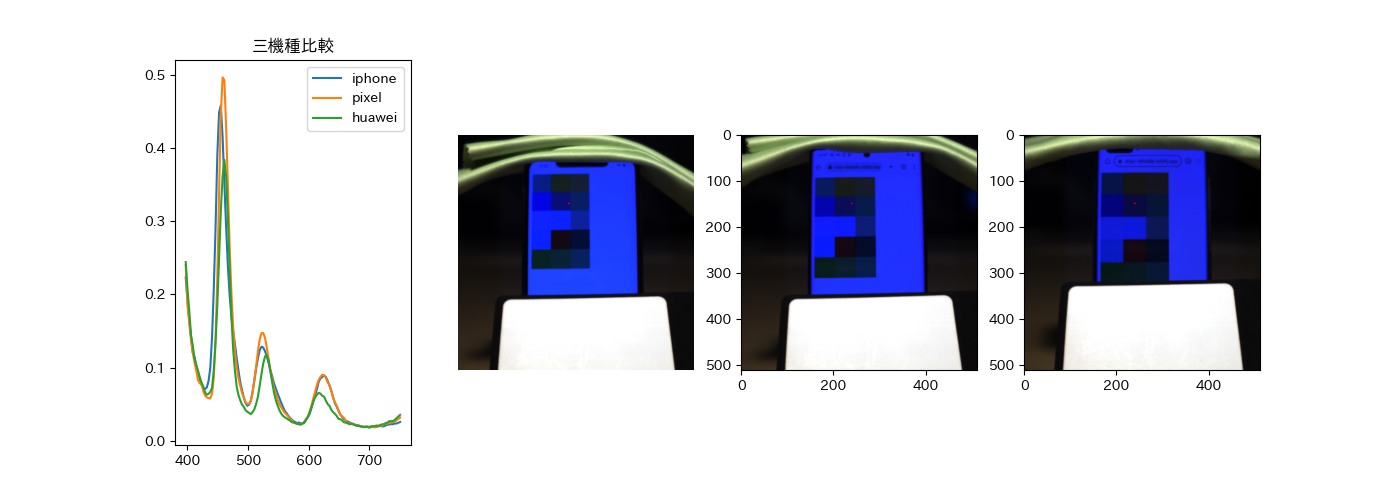

In [5]:
pixel_x = 240 # X座標
pixel_y = 150  # Y座標
color = (255, 0, 0)  # 色(RGB値)

dots=[-1,0,1]
image_i = Image.open(IMG_PATH_iphone)
for i in dots:
    for j in dots:
        image_i.putpixel((pixel_x+i, pixel_y+j), color)
        
image_p = Image.open(IMG_PATH_pixel)
for i in dots:
    for j in dots:
        image_p.putpixel((pixel_x+i, pixel_y+j), color)
image_h = Image.open(IMG_PATH_huawei)
for i in dots:
    for j in dots:
        image_h.putpixel((pixel_x+i, pixel_y+j), color)

x = wave_lengthes[:121]
y_i = spec_img_i.read_pixel(512-pixel_x,pixel_y)[:121]
y_p = spec_img_p.read_pixel(512-pixel_x,pixel_y)[:121]
y_h = spec_img_h.read_pixel(512-pixel_x,pixel_y)[:121]

fig = plt.figure(figsize = (14,5))
ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)


ax1.plot(x,y_i,label='iphone')
ax1.plot(x,y_p,label='pixel')
ax1.plot(x,y_h,label='huawei')
ax1.set_title('三機種比較')
ax1.legend()
ax2.imshow(image_i)
ax2.axis('off')
ax3.imshow(image_p)
ax4.imshow(image_h)
mplcursors.cursor(hover=True)

plt.show()

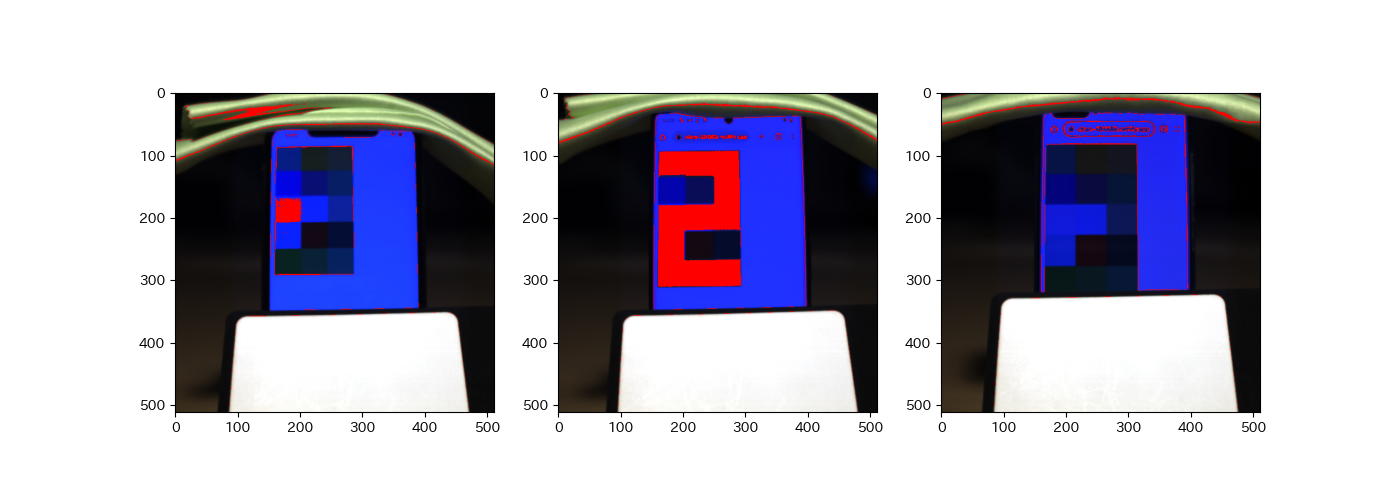

In [6]:
color = (255,0,0)
image_i = Image.open(IMG_PATH_iphone)
std = 0.038
base = 0.373
LOWER = base - std 
UPPER = base + std

for i in range(512):
    for j in range(512):
        green_i = spec_img_i.read_pixel(511-i,j)[43]
        if LOWER < green_i and green_i < UPPER:
            image_i.putpixel((i, j), color)
            
image_p = Image.open(IMG_PATH_pixel)
for i in range(512):
    for j in range(512):
        green_p = spec_img_p.read_pixel(511-i,j)[43]
        if LOWER < green_p and green_p < UPPER:
            image_p.putpixel((i, j), color)
            

image_h = Image.open(IMG_PATH_huawei)
for i in range(512):
    for j in range(512):
        green_h = spec_img_h.read_pixel(511-i,j)[43]
        if LOWER < green_h and green_h < UPPER:
            image_h.putpixel((i, j), color)
            
fig2 = plt.figure(figsize = (14,5))
_ax1 = fig2.add_subplot(1,3,1)
_ax2 = fig2.add_subplot(1,3,2)
_ax3 = fig2.add_subplot(1,3,3)

_ax1.imshow(image_i)
_ax2.imshow(image_p)
_ax3.imshow(image_h)
plt.show()

In [7]:
ex_max_i=argrelmax(y_i,order=3)
ex_max_p = argrelmax(y_p,order=3)
ex_max_h = argrelmax(y_h,order=3)
print(ex_max_i,ex_max_p,ex_max_h)

(array([ 20,  43,  78, 108]),) (array([ 21,  44,  77, 102]),) (array([22, 46, 75]),)


In [8]:
ex_max_i[0][0]

20

In [9]:
for elem in ex_max_i[0]:
    print(y_i[elem])

0.45813954
0.1284029
0.089088395
0.020554494


In [10]:
for i in ex_max_p[0]:
    print(y_p[i])

0.4962963
0.14717542
0.090205185
0.019422075


In [11]:
for i in ex_max_h[0]:
    print(y_h[i])

0.3839038
0.11619985
0.065397605


In [12]:
0.617

0.617